  # About Dataset

# CONTEXT

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# CONTENT

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
pd.options.display.max_columns = None

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data = data.drop(['Time'], axis =1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
data.duplicated().any()

True

In [17]:
data = data.drop_duplicates()

In [18]:
data.shape

(275663, 30)

In [19]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [23]:
## Correlation
import seaborn as sns
plt.figure(figsize=(20,20))
#plot heat map
data = sns.heatmap.corr,annot=True,cmap="RdYlGn")

SyntaxError: unmatched ')' (515219339.py, line 5)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


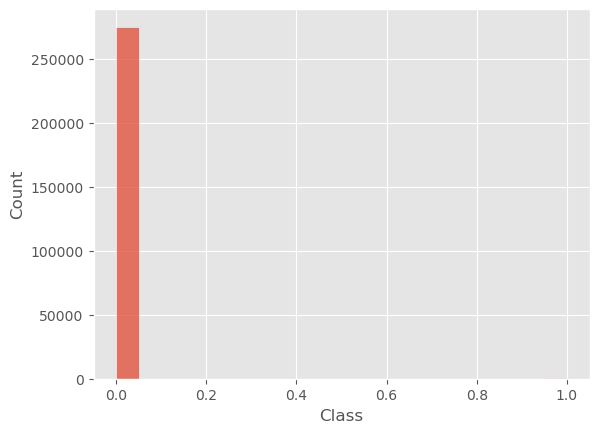

In [22]:
sns.histplot(data['Class'])
plt.show()

In [23]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [57]:
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
X_smote, y_smote = over_sample.fit_resample(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Class', ylabel='Count'>

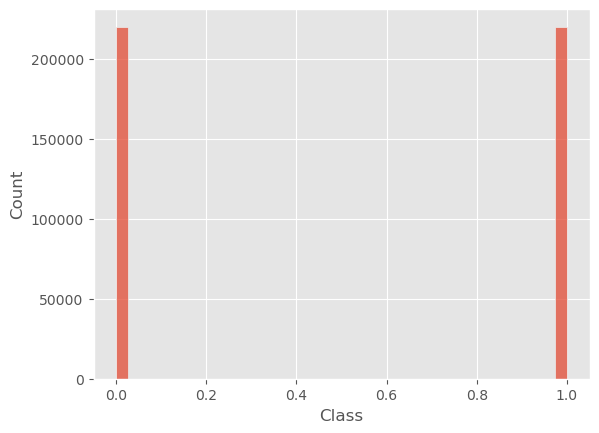

In [59]:
sns.histplot(y_smote)

In [60]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "XGBClassifier" : XGBClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9992200678359603

 Precision: 0.8870967741935484

 Recall: 0.6043956043956044

 F1 Score: 0.718954248366013

==========Decision Tree Classifier===========

 Accuaracy: 0.9990024123483213

 Precision: 0.6836734693877551

 Recall: 0.7362637362637363

 F1 Score: 0.7089947089947091

==========XGBClassifier===========

 Accuaracy: 0.9995465510674187

 Precision: 0.9459459459459459

 Recall: 0.7692307692307693

 F1 Score: 0.8484848484848485


In [30]:
# Undersampling

In [31]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [32]:
normal.shape

(275190, 30)

In [33]:
fraud.shape

(473, 30)

In [34]:
normal_sample = normal.sample(n=473)

In [35]:
normal_sample.shape

(473, 30)

In [36]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [37]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.030642,0.623941,0.898282,-0.671797,0.350616,0.520583,-0.196311,0.376840,0.223266,-0.935959,0.711307,0.399813,0.638410,-1.498308,0.417506,1.655348,-0.547259,1.749354,-0.679960,-0.045943,0.361556,1.089367,0.008772,0.150628,-1.401868,0.106346,0.283320,0.285908,-0.348072,0
1,1.610697,-1.359024,-0.457075,0.823724,-1.237437,-0.300062,-0.568307,-0.129750,-0.214172,0.907676,-1.118091,0.110243,0.748229,-0.153393,0.673842,-1.065700,-0.511703,1.634806,-1.646220,-0.162382,0.009835,0.143097,0.007198,-0.122825,-0.281849,-0.578638,0.043482,0.015379,0.614307,0
2,-1.422837,-0.407051,1.727306,0.278809,1.512894,-0.851555,-0.172988,0.123598,-0.132372,-0.645245,-1.575945,-0.105681,0.011409,-0.152927,-0.244652,-0.204233,-0.180658,-0.216702,0.799259,0.321200,-0.134792,-0.624011,-0.158706,-0.430336,0.527234,0.354818,-0.027532,0.076648,-0.349231,0
3,-0.800261,0.908438,1.409820,-0.073882,1.282855,-1.073813,1.412602,-0.452247,-0.820194,-0.512131,-0.753467,-0.117169,0.253362,0.128940,0.128914,-0.070826,-0.775980,-0.221932,-0.606306,0.043617,0.007950,0.076989,-0.499581,0.044888,0.906078,-0.388550,-0.164002,-0.167316,-0.341275,0
4,1.109004,0.199623,0.981525,1.846329,-0.526929,-0.144502,-0.159250,0.055132,-0.525298,0.540102,1.211172,1.285517,0.489945,-0.091845,-1.343929,0.438258,-0.338240,-0.550940,-0.084474,-0.044544,-0.244523,-0.643026,0.119625,0.575278,0.133612,0.718246,-0.064019,0.008091,-0.272708,0


In [38]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [39]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
      "XGBClassifier" : XGBClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9526315789473684

 Precision: 0.9894736842105263

 Recall: 0.9215686274509803

 F1 Score: 0.9543147208121827

==========Decision Tree Classifier===========

 Accuaracy: 0.9052631578947369

 Precision: 0.9038461538461539

 Recall: 0.9215686274509803

 F1 Score: 0.9126213592233009

==========XGBClassifier===========

 Accuaracy: 0.9473684210526315

 Precision: 0.9791666666666666

 Recall: 0.9215686274509803

 F1 Score: 0.9494949494949494


In [42]:
# OVERSAMPLING

In [43]:
X = data.drop('Class', axis = 1)
y= data['Class']

In [44]:
X.shape

(275663, 29)

In [45]:
y.shape

(275663,)

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [48]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [50]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "XGBClassifier" : XGBClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9453468512663977

 Precision: 0.9730758087880251

 Recall: 0.9159682199152773

 F1 Score: 0.943658806121111

==========Decision Tree Classifier===========

 Accuaracy: 0.9982375813074603

 Precision: 0.9974044831654415

 Recall: 0.999072777848481

 F1 Score: 0.9982379334774474

==========XGBClassifier===========

 Accuaracy: 0.9997456302917984

 Precision: 0.9994911958714179

 Recall: 1.0

 F1 Score: 0.9997455331988294


In [68]:
dtc = XGBClassifier()
dtc.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
import joblib

In [63]:
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [64]:
model = joblib.load("credit_card_model.pkl")

In [65]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
pred[0]

0

In [67]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation
